<a href="https://colab.research.google.com/github/qmcnn/Data-Mining/blob/main/Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
covid19 = pd.read_csv('/content/drive/MyDrive/Year4/Data Mining/covid_19_clean_complete.csv')
covid19

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


ข้อมูลมีขนาดเท่าไหร่ มีกี่ตัวแปร อะไรบ้าง? ข้อมูลมีการเก็บสถิติการติดโควิดเมื่อใด? (วันเริ่มต้น - วันสุดท้าย)

In [14]:
covid19.shape

(49068, 10)

In [17]:
covid19.iloc[0]

Province/State                      NaN
Country/Region              Afghanistan
Lat                            33.93911
Long                          67.709953
Date                         2020-01-22
Confirmed                             0
Deaths                                0
Recovered                             0
Active                                0
WHO Region        Eastern Mediterranean
Name: 0, dtype: object

In [19]:
covid19.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [25]:
min(covid19['Date'])

'2020-01-22'

In [26]:
max(covid19['Date'])

'2020-07-27'

สำรวจค่าว่างในข้อมูล ตัวแปรไหนมีค่าสูญหายบ้าง จำนวนเท่าไหร่

In [20]:
covid19.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

ทวีปไหนมีจำนวนเคส (Confirmed) มากที่สุด

In [79]:
confirmed = covid19.groupby(['WHO Region'])[['Confirmed']].sum().sort_values(by='Confirmed',ascending=False)
confirmed_max = confirmed.idxmax()
confirmed_max

Confirmed    Americas
dtype: object

ทวีปไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด

In [80]:
Recovered = covid19.groupby(['WHO Region'])[['Recovered']].sum().sort_values(by='Recovered',ascending=False)
Recovered_max = Recovered.idxmax()
Recovered_max

Recovered    Americas
dtype: object

ทวีปไหนมีมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด

In [74]:
Deaths = covid19.groupby('WHO Region')[['Deaths']].sum().sort_values(by='Deaths', ascending=False)
Deaths_max = Deaths.idxmax()
Deaths_max

Deaths    Americas
dtype: object

สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย

<Axes: xlabel='WHO Region'>

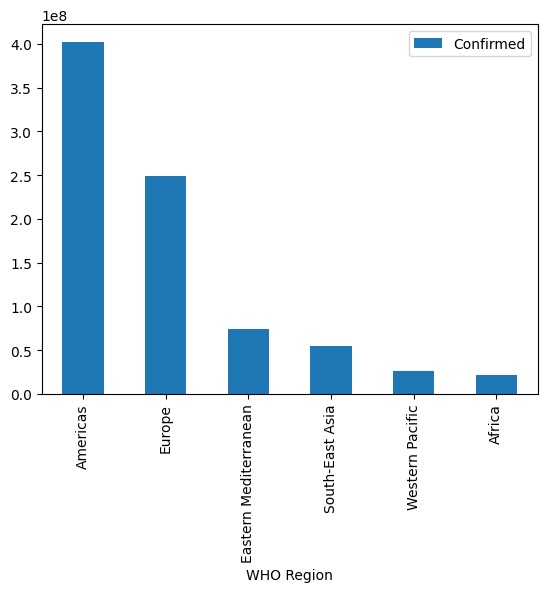

In [81]:
confirmed.plot.bar()

<Axes: xlabel='WHO Region'>

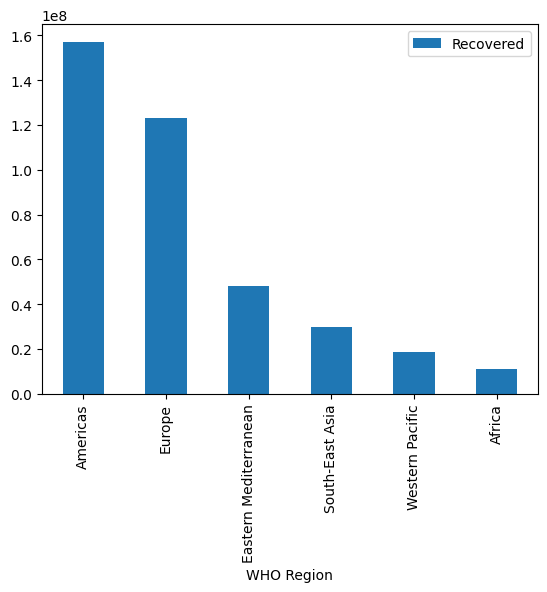

In [83]:
Recovered.plot.bar()

<Axes: xlabel='WHO Region'>

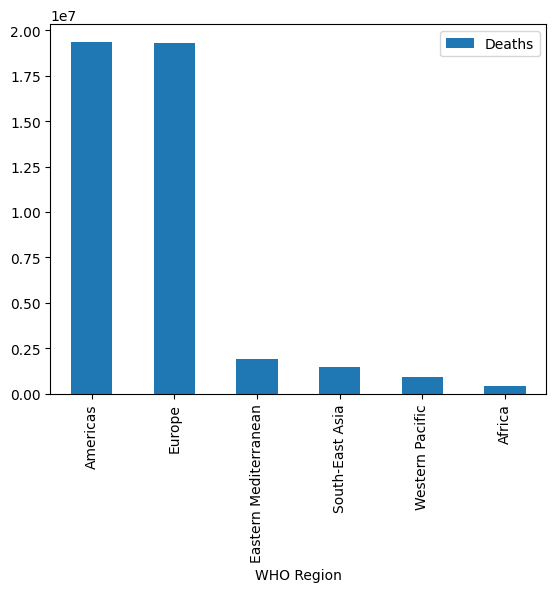

In [77]:
Deaths.plot.bar()

ประเทศไหนมีจำนวนเคส (Confirmed) มากที่สุด

In [84]:
confirmed_country = covid19.groupby(['Country/Region'])[['Confirmed']].sum().sort_values(by='Confirmed',ascending=False)
confirmed_country_max = confirmed_country.idxmax()
confirmed_country_max

Confirmed    US
dtype: object

ประเทศไหนมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด

In [87]:
Deaths_country = covid19.groupby(['Country/Region'])[['Deaths']].sum().sort_values(by='Deaths',ascending=False)
Deaths_country_max = Deaths_country.idxmax()
Deaths_country_max

Deaths    US
dtype: object

ประเทศไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด

In [88]:
Recovered_country = covid19.groupby(['Country/Region'])[['Recovered']].sum().sort_values(by='Recovered',ascending=False)
Recovered_country_max = Recovered_country.idxmax()
Recovered_country_max

Recovered    US
dtype: object

สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย


In [93]:
top5_confirmed_country = confirmed_country.head(5)
top5_confirmed_country

,Confirmed
Country/Region,
US,224345948
Brazil,89524967
Russia,45408411
India,40883464
Spain,27404045


<Axes: xlabel='Country/Region'>

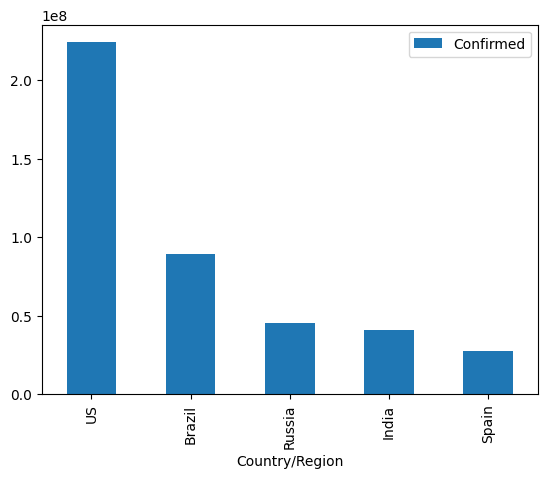

In [92]:
top5_confirmed_country.plot.bar()

In [95]:
top5_Deaths_country = Deaths_country.head(5)
top5_Deaths_country

,Deaths
Country/Region,
US,11011411
United Kingdom,3997775
Brazil,3938034
Italy,3707717
France,3048524


<Axes: xlabel='Country/Region'>

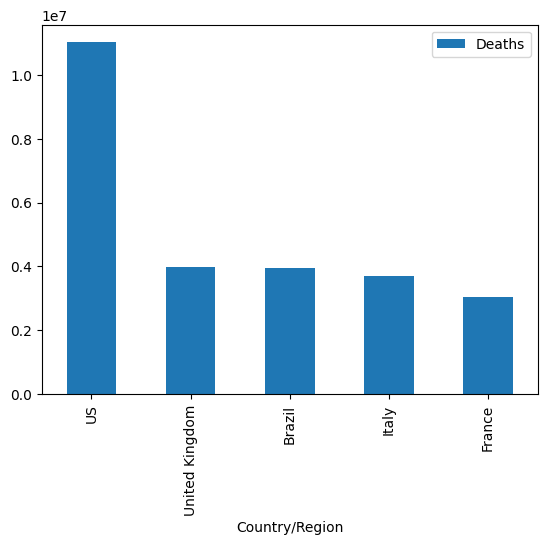

In [97]:
top5_Deaths_country.plot.bar()

In [99]:
top5_Recovered_country = Recovered_country.head(5)
top5_Recovered_country

,Recovered
Country/Region,
US,56353416
Brazil,54492873
Russia,25120448
India,23783720
Germany,17107839


<Axes: xlabel='Country/Region'>

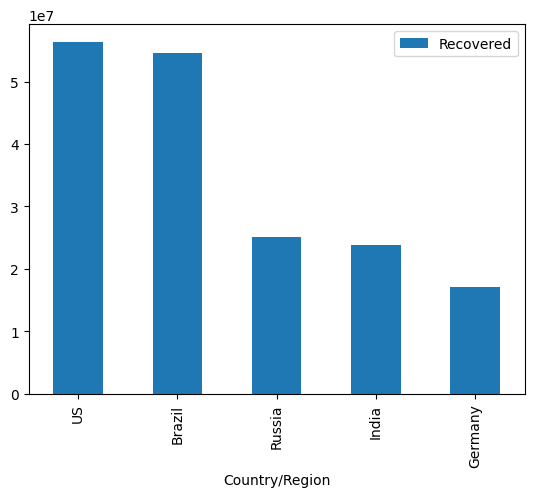

In [100]:
top5_Recovered_country.plot.bar()

สรุปข้อมูลโควิดประจำวันของประเทศไทย

In [103]:
covid19[(covid19['Country/Region']=='Thailand')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
207,NaN,Thailand,15.870032,100.992541,2020-01-22,2,0,0,2,South-East Asia
468,NaN,Thailand,15.870032,100.992541,2020-01-23,3,0,0,3,South-East Asia
729,NaN,Thailand,15.870032,100.992541,2020-01-24,5,0,0,5,South-East Asia
990,NaN,Thailand,15.870032,100.992541,2020-01-25,7,0,0,7,South-East Asia
1251,NaN,Thailand,15.870032,100.992541,2020-01-26,8,0,2,6,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47970,NaN,Thailand,15.870032,100.992541,2020-07-23,3279,58,3107,114,South-East Asia
48231,NaN,Thailand,15.870032,100.992541,2020-07-24,3279,58,3107,114,South-East Asia
48492,NaN,Thailand,15.870032,100.992541,2020-07-25,3282,58,3109,115,South-East Asia
48753,NaN,Thailand,15.870032,100.992541,2020-07-26,3291,58,3109,124,South-East Asia


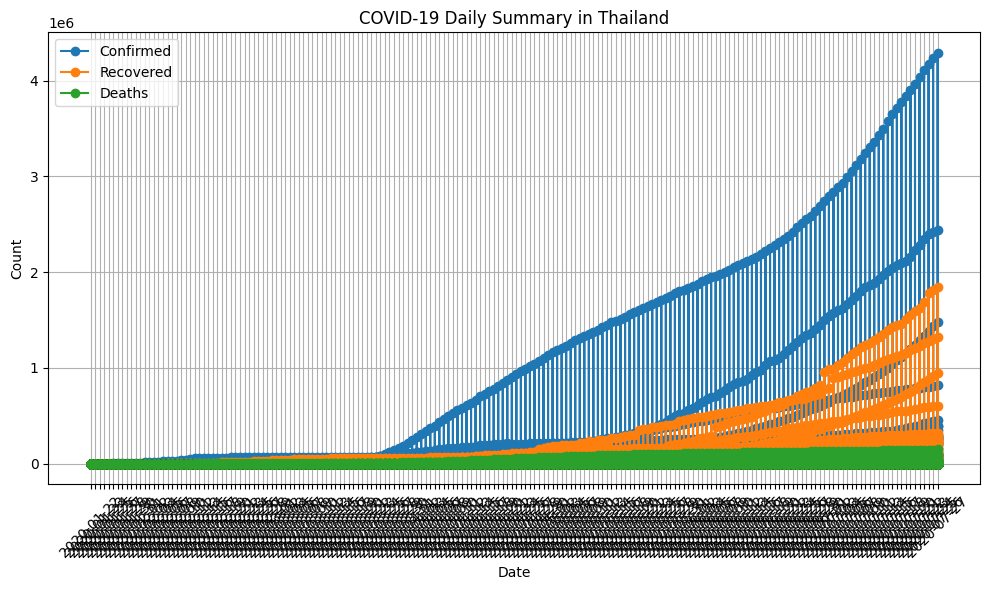

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(covid19['Date'], covid19['Confirmed'], marker='o', label='Confirmed')
plt.plot(covid19['Date'], covid19['Recovered'], marker='o', label='Recovered')
plt.plot(covid19['Date'], covid19['Deaths'], marker='o', label='Deaths')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Daily Summary in Thailand')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

สรุปข้อมูลโควิดประจำวันของประเทศไทย ในช่วงก่อนเทศกาลสงกรานต์หนึ่งสัปดาห์ ระหว่างเทศกาลสงกรานต์ (13-18 เม.ย.) และหลังเทศกาลสงกรานต์หนึ่งสัปดาห์

In [ ]:
#หาค่าเฉลี่ย